Fonte dos dados: https://www.kaggle.com/datasets/szamil/who-suicide-statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparação dos Dados

In [2]:
data = pd.read_csv('who_suicide_statistics.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
data.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [5]:
data.sample(n=15)

,country,year,sex,age,suicides_no,population
43578,Virgin Islands (USA),1998,male,15-24 years,2.0,7062.0
12281,Dominican Republic,2001,female,75+ years,1.0,NaN
27465,New Zealand,2010,male,5-14 years,3.0,298490.0
23827,Luxembourg,2011,male,25-34 years,4.0,37499.0
24041,Malaysia,2011,female,75+ years,0.0,NaN
37246,Suriname,1979,male,55-74 years,1.0,12637.0
7193,Brunei Darussalam,2012,female,75+ years,0.0,2600.0
13436,El Salvador,2013,male,35-54 years,129.0,579811.0
6101,Bosnia and Herzegovina,1987,female,75+ years,11.0,58300.0
1054,Antigua and Barbuda,2015,male,55-74 years,0.0,5784.0


In [6]:
data.shape

(43776, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [8]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [9]:
data.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [10]:
data.describe(include = 'all')

,country,year,sex,age,suicides_no,population
count,43776,43776.000000,43776,43776,41520.000000,3.831600e+04
unique,141,NaN,2,6,NaN,NaN
top,Hungary,NaN,female,15-24 years,NaN,NaN
freq,456,NaN,21888,7296,NaN,NaN
mean,NaN,1998.502467,NaN,NaN,193.315390,1.664091e+06
std,NaN,10.338711,NaN,NaN,800.589926,3.647231e+06
min,NaN,1979.000000,NaN,NaN,0.000000,2.590000e+02
25%,NaN,1990.000000,NaN,NaN,1.000000,8.511275e+04
50%,NaN,1999.000000,NaN,NaN,14.000000,3.806550e+05
75%,NaN,2007.000000,NaN,NaN,91.000000,1.305698e+06


# 2. Limpeza dos dados

In [11]:
data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [12]:
data.dropna(inplace = True)

In [13]:
data

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


In [14]:
data.duplicated().sum()

0

# 3. Visualizações

In [15]:
data['suicides_rel'] = data['suicides_no'] / data['population']
data

,country,year,sex,age,suicides_no,population,suicides_rel
24,Albania,1987,female,15-24 years,14.0,289700.0,0.000048
25,Albania,1987,female,25-34 years,4.0,257200.0,0.000016
26,Albania,1987,female,35-54 years,6.0,278800.0,0.000022
27,Albania,1987,female,5-14 years,0.0,311000.0,0.000000
28,Albania,1987,female,55-74 years,0.0,144600.0,0.000000
...,...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,0.000434
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,0.000080
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,0.000000
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,0.000000


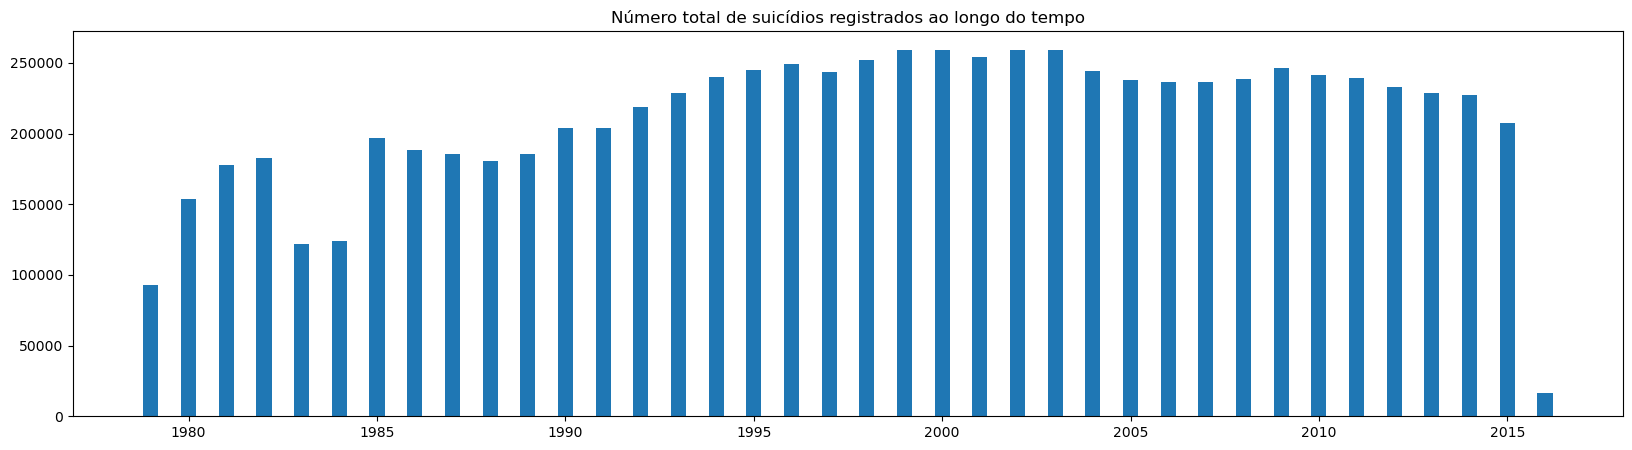

In [16]:
df = data.groupby(['year']).sum()
fig = plt.figure(figsize = (20, 5))
plt.bar(df.index, df['suicides_no'], width = 0.4)
plt.title("Número total de suicídios registrados ao longo do tempo")
plt.show()

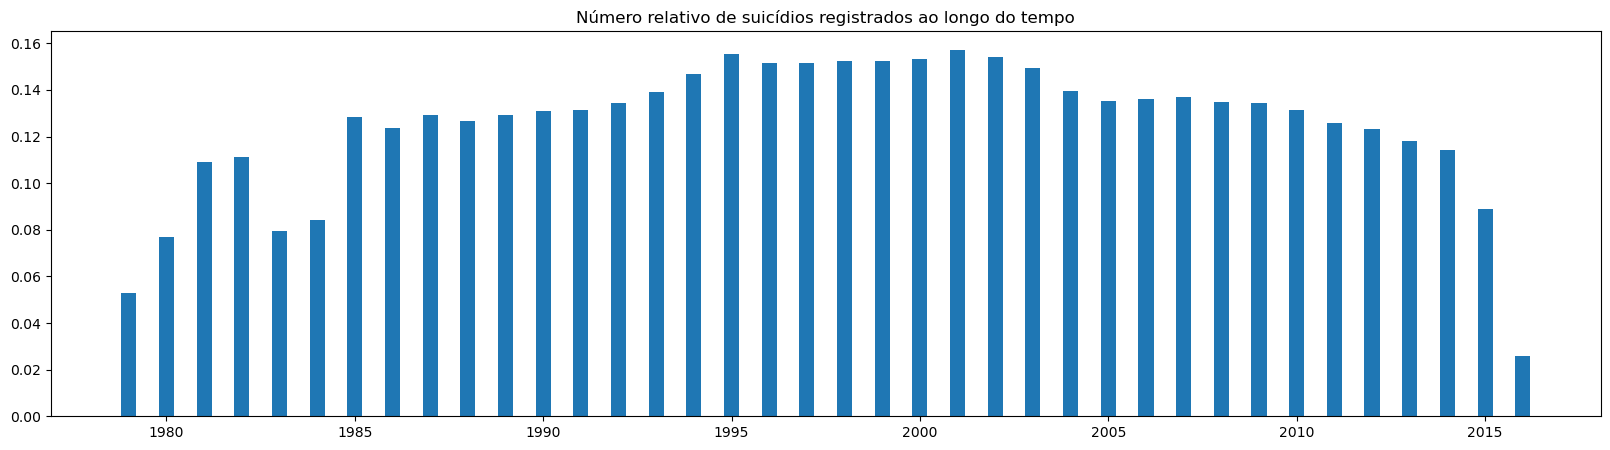

In [17]:
df = data.groupby(['year']).sum()
fig = plt.figure(figsize = (20, 5))
plt.bar(df.index, df['suicides_rel'], width = 0.4)
plt.title("Número relativo de suicídios registrados ao longo do tempo")
plt.show()

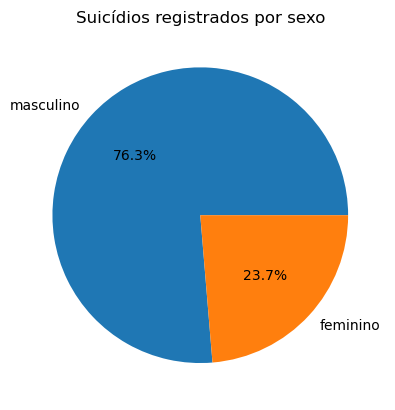

In [18]:
df = data.groupby(['sex']).sum().sort_values('suicides_no', ascending=False)
plt.title('Suicídios registrados por sexo')
plt.pie(df['suicides_no'], labels=['masculino', 'feminino'], autopct='%1.1f%%')
plt.show()

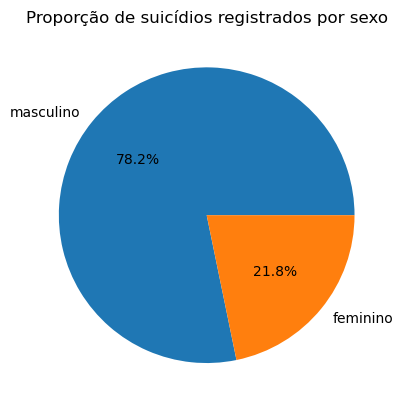

In [19]:
df = data.groupby(['sex']).sum().sort_values('suicides_rel', ascending=False)
plt.title('Proporção de suicídios registrados por sexo')
plt.pie(df['suicides_rel'], labels=['masculino', 'feminino'], autopct='%1.1f%%')
plt.show()

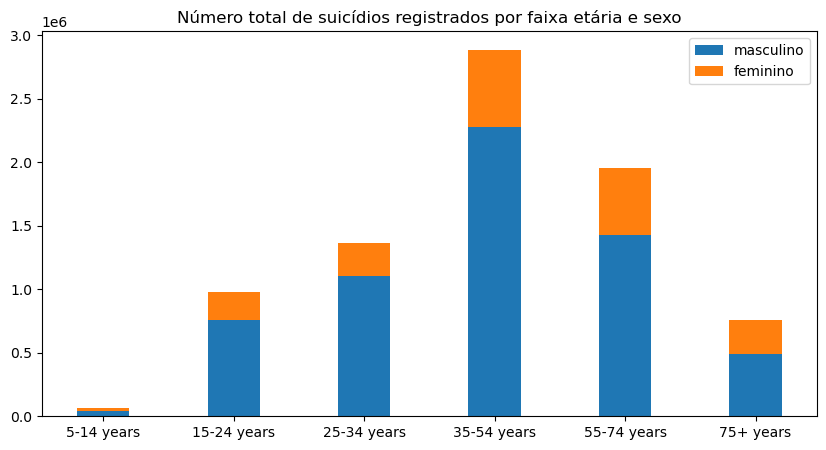

In [20]:
ages = list(pd.concat([data[3:4], data[0:3], data[4:]])[0:6]['age'])
df = data.groupby(['age', 'sex']).sum()
fig = plt.figure(figsize = (10, 5))
plt.bar(ages, list(df.query(f'sex == "male" and age == "{age}"')['suicides_no'][0] for age in ages), width = 0.4)
plt.bar(ages, list(df.query(f'sex == "female" and age == "{age}"')['suicides_no'][0] for age in ages), bottom = list(df.query(f'sex == "male" and age == "{age}"')['suicides_no'][0] for age in ages), width = 0.4)
plt.title("Número total de suicídios registrados por faixa etária e sexo")
plt.legend(["masculino", "feminino"])
plt.show()

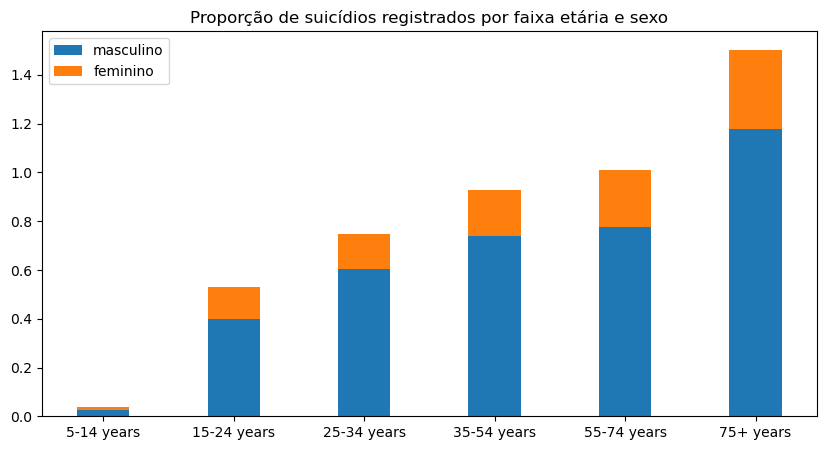

In [21]:
ages = list(pd.concat([data[3:4], data[0:3], data[4:]])[0:6]['age'])
df = data.groupby(['age', 'sex']).sum()
fig = plt.figure(figsize = (10, 5))
plt.bar(ages, list(df.query(f'sex == "male" and age == "{age}"')['suicides_rel'][0] for age in ages), width = 0.4)
plt.bar(ages, list(df.query(f'sex == "female" and age == "{age}"')['suicides_rel'][0] for age in ages), bottom = list(df.query(f'sex == "male" and age == "{age}"')['suicides_rel'][0] for age in ages), width = 0.4)
plt.title("Proporção de suicídios registrados por faixa etária e sexo")
plt.legend(["masculino", "feminino"])
plt.show()

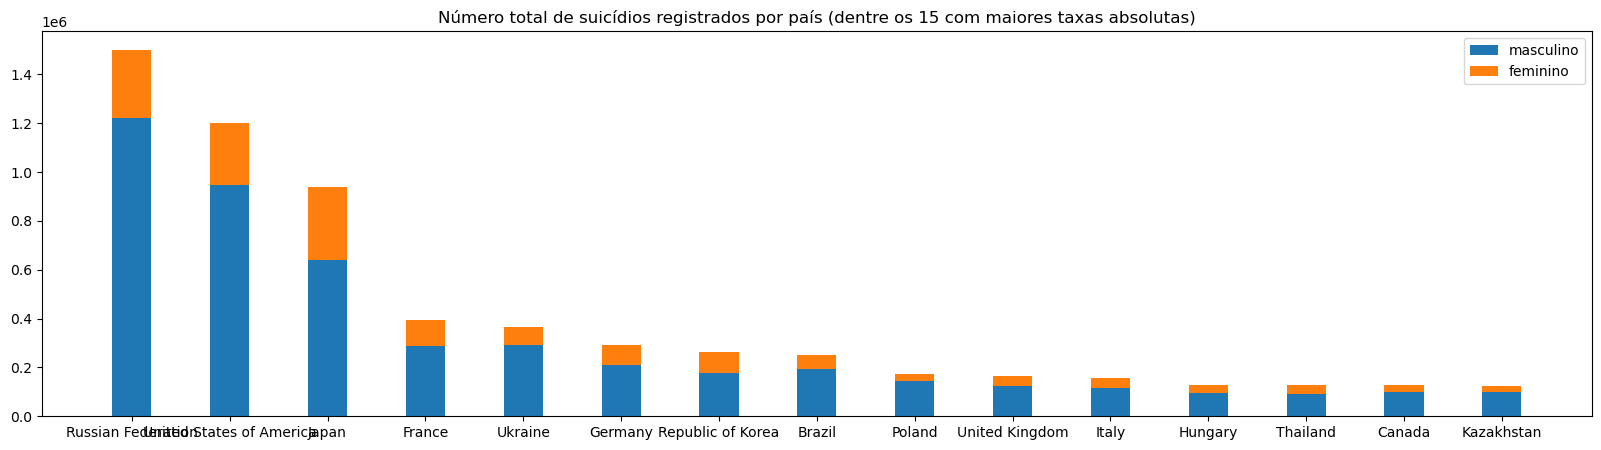

In [22]:
countries_no = data.groupby(['country']).sum().sort_values('suicides_no', ascending=False)[:15].index
df = data.groupby(['country', 'sex']).sum()
fig = plt.figure(figsize = (20, 5))
plt.bar(countries_no, list(df.query(f'sex == "male" and country == "{country}"')['suicides_no'][0] for country in countries_no), width = 0.4)
plt.bar(countries_no, list(df.query(f'sex == "female" and country == "{country}"')['suicides_no'][0] for country in countries_no), bottom = list(df.query(f'sex == "male" and country == "{country}"')['suicides_no'][0] for country in countries_no), width = 0.4)
plt.title("Número total de suicídios registrados por país (dentre os 15 com maiores taxas absolutas)")
plt.legend(["masculino", "feminino"])
plt.show()

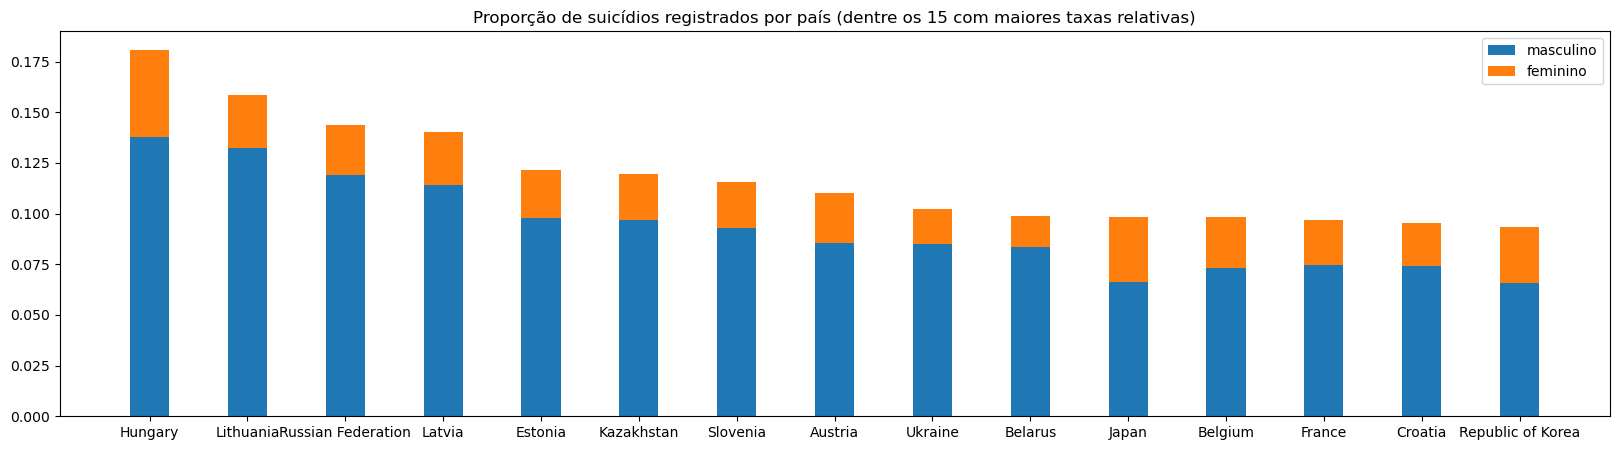

In [23]:
countries_rel = data.groupby(['country']).sum().sort_values('suicides_rel', ascending=False)[:15].index
df = data.groupby(['country', 'sex']).sum()
fig = plt.figure(figsize = (20, 5))
plt.bar(countries_rel, list(df.query(f'sex == "male" and country == "{country}"')['suicides_rel'][0] for country in countries_rel), width = 0.4)
plt.bar(countries_rel, list(df.query(f'sex == "female" and country == "{country}"')['suicides_rel'][0] for country in countries_rel), bottom = list(df.query(f'sex == "male" and country == "{country}"')['suicides_rel'][0] for country in countries_rel), width = 0.4)
plt.title("Proporção de suicídios registrados por país (dentre os 15 com maiores taxas relativas)")
plt.legend(["masculino", "feminino"])
plt.show()

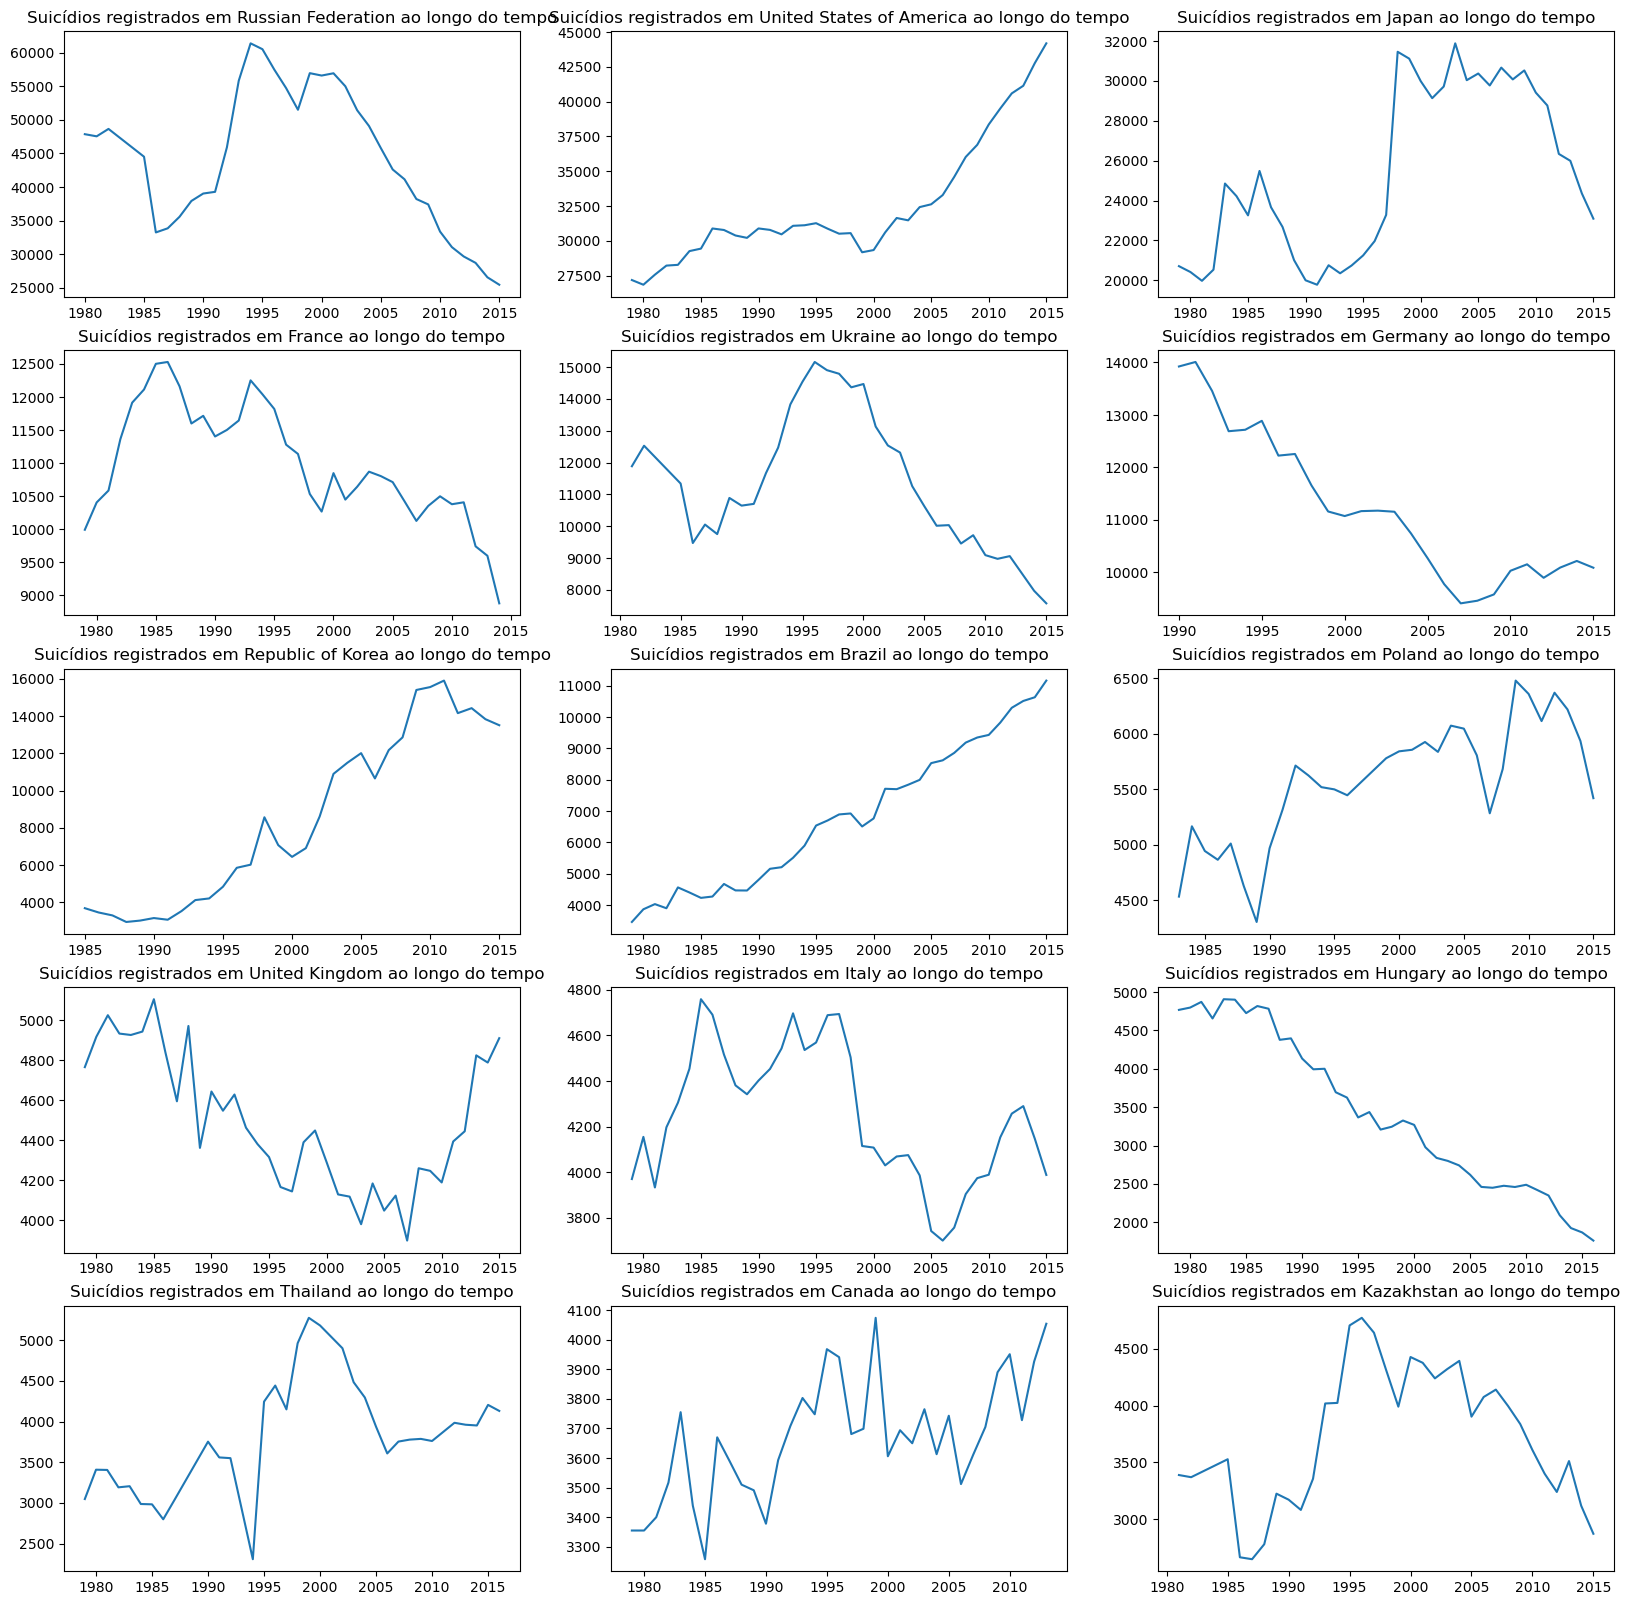

In [24]:
df = data.groupby(['country', 'year']).sum()
fig, axs = plt.subplots(5, 3, figsize=(20, 20))
for (i, country) in enumerate(countries_no):
    axs[i//3, i%3].plot(df.query(f'country == "{country}"').index.get_level_values(1), df.query(f'country == "{country}"')['suicides_no'])
    axs[i//3, i%3].set_title(f'Suicídios registrados em {country} ao longo do tempo')

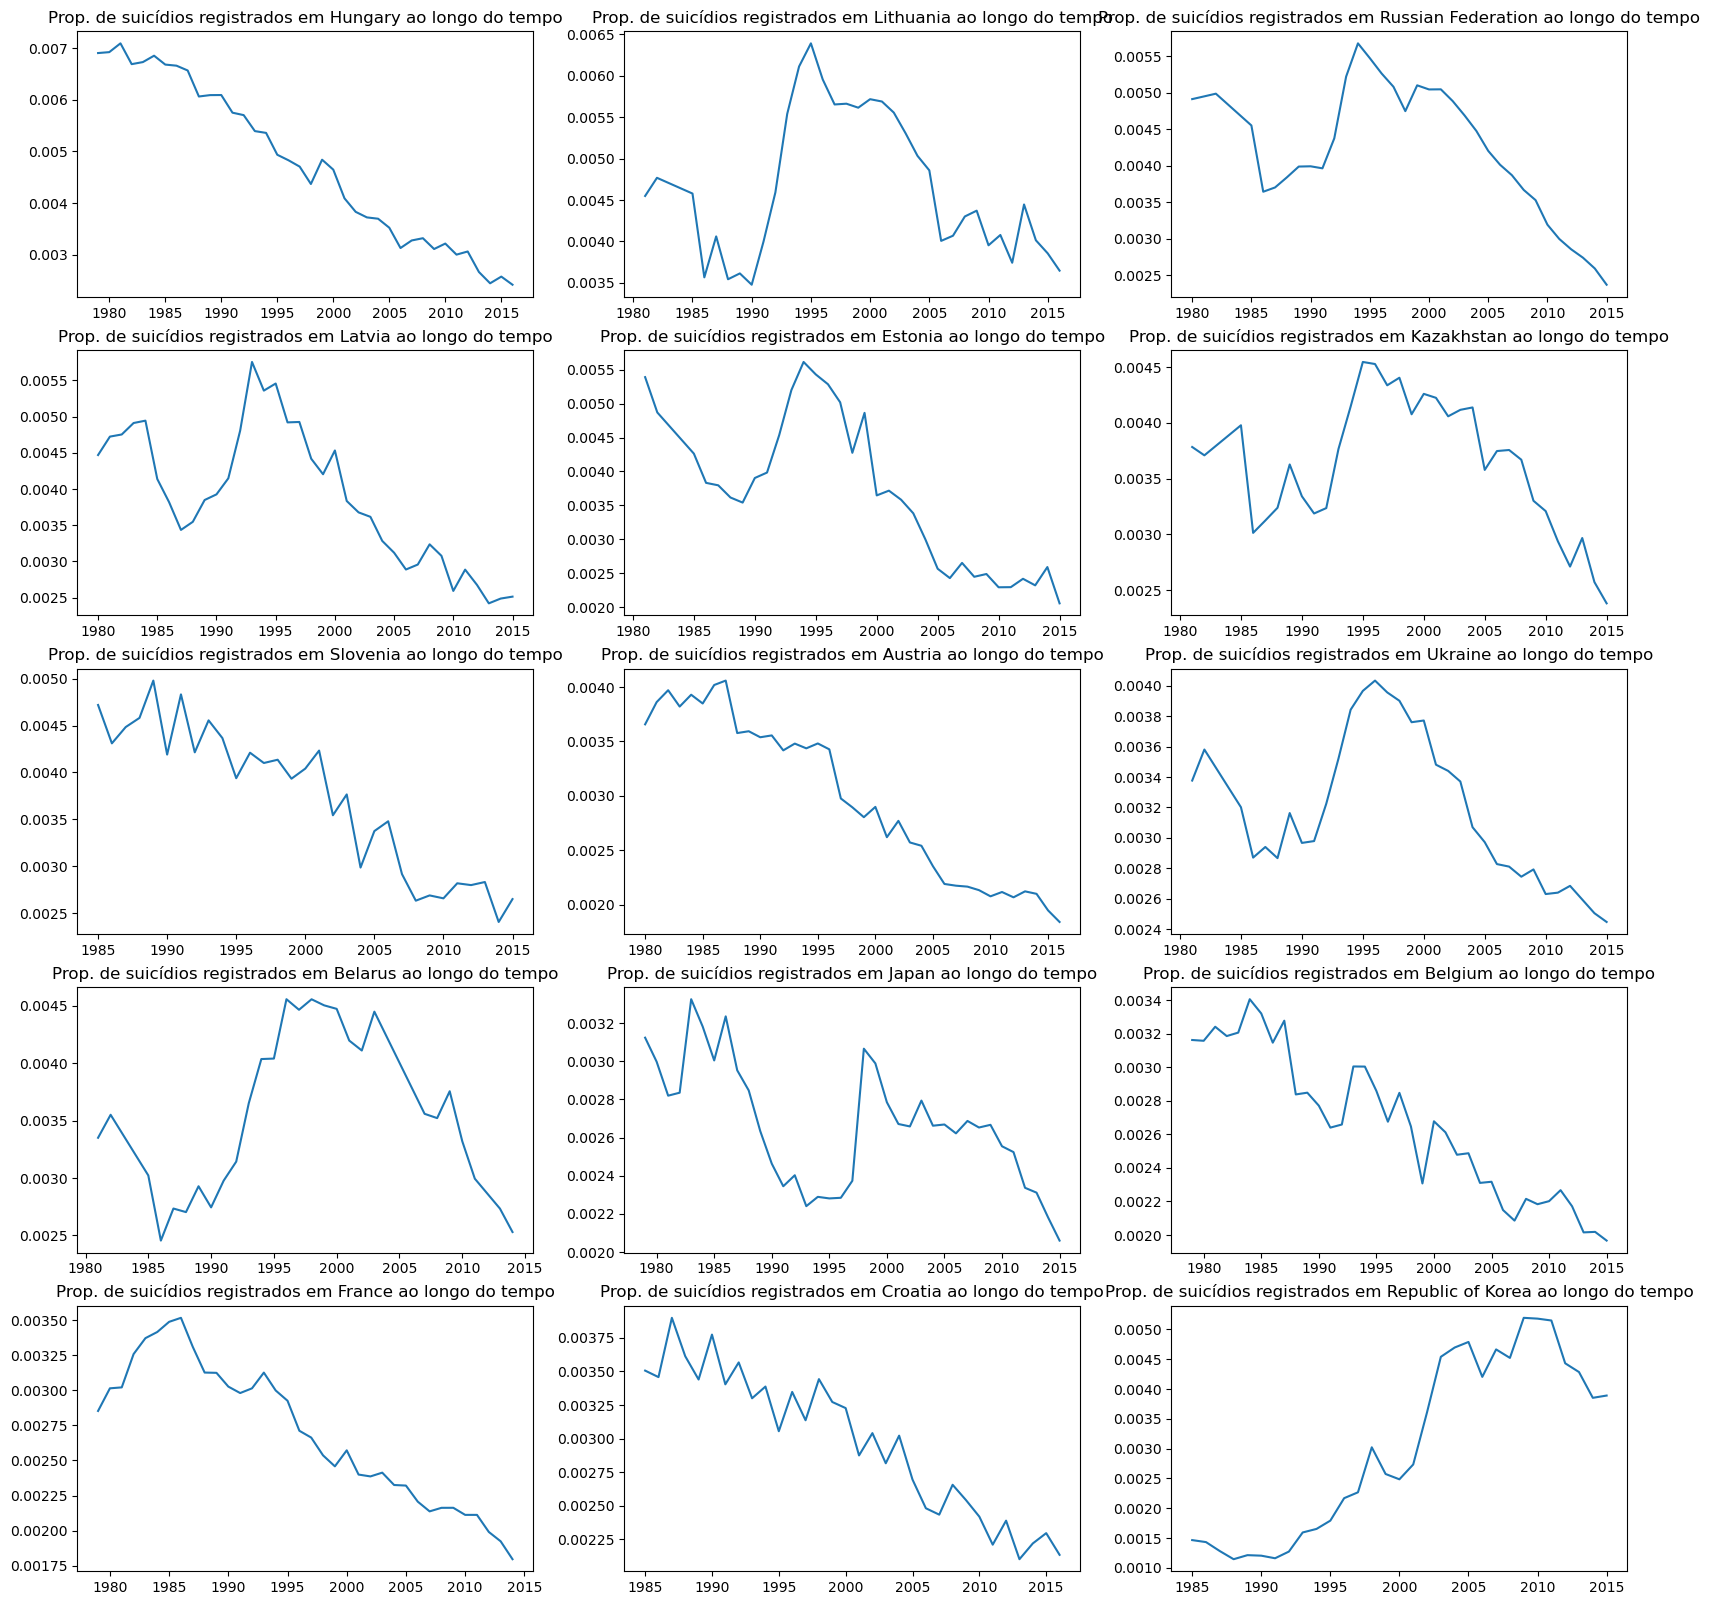

In [25]:
df = data.groupby(['country', 'year']).sum()
fig, axs = plt.subplots(5, 3, figsize=(20, 20))
for (i, country) in enumerate(countries_rel):
    axs[i//3, i%3].plot(df.query(f'country == "{country}"').index.get_level_values(1), df.query(f'country == "{country}"')['suicides_rel'])
    axs[i//3, i%3].set_title(f'Prop. de suicídios registrados em {country} ao longo do tempo')

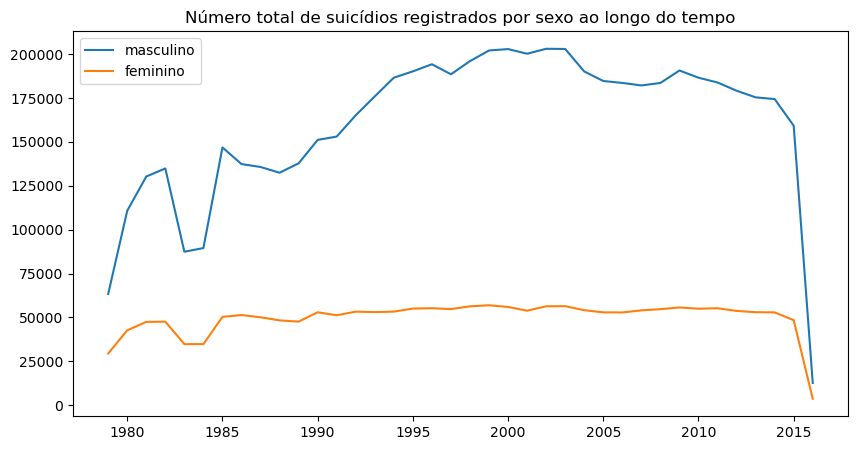

In [26]:
df = data.groupby(['sex', 'year']).sum()
plt.figure(figsize = (10, 5))
plt.plot(df.query(f'sex == "male"').index.get_level_values(1), df.query(f'sex == "male"')['suicides_no'], label='masculino')
plt.plot(df.query(f'sex == "female"').index.get_level_values(1), df.query(f'sex == "female"')['suicides_no'], label='feminino')
plt.title("Número total de suicídios registrados por sexo ao longo do tempo")
plt.legend()
plt.show()

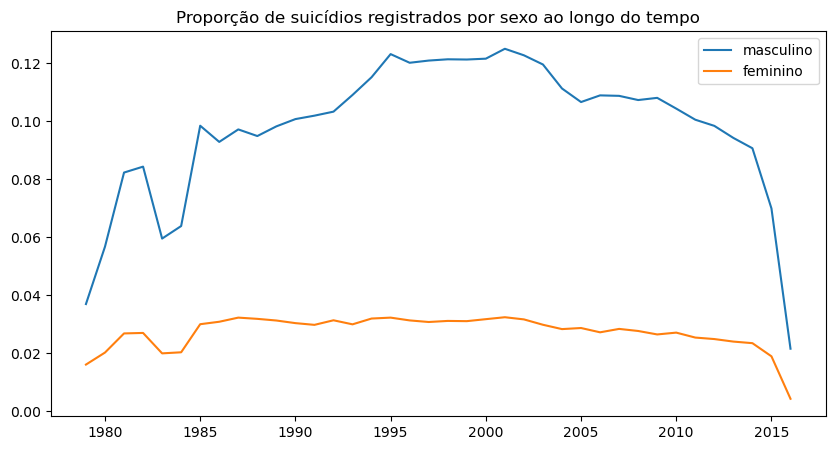

In [27]:
df = data.groupby(['sex', 'year']).sum()
plt.figure(figsize = (10, 5))
plt.plot(df.query(f'sex == "male"').index.get_level_values(1), df.query(f'sex == "male"')['suicides_rel'], label='masculino')
plt.plot(df.query(f'sex == "female"').index.get_level_values(1), df.query(f'sex == "female"')['suicides_rel'], label='feminino')
plt.title("Proporção de suicídios registrados por sexo ao longo do tempo")
plt.legend()
plt.show()